In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install spacy
# !pip install sklearn
# !pip install cufflinks

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Converting Chapter 2 to a proper DataFrame

### We will make 2 dataframes
#### 1. df_sent --> Parsing the data sentence wise
#### 2. df_para --> parsing the data paragraph wise

In [3]:
# para_data--> [[Ch_name,Para_name,Para_descr]]     (Parsing para by para)

para_data = [[]]
para_name = ''
chapter_name = ''
EndOfChap = 0
with open('Our_Past_1_Chapter2.txt', encoding="utf8") as f:
    for count, line in enumerate(f):
        if EndOfChap < 2:
            if 'CHAPTER' in line:
                chapter_name = line.split(':')[1].strip()
                continue
                
            if line == '\n':
                para_data.append([])
                EndOfChap +=1
                
            elif para_data[-1] == [] and para_name == '':
                para_name = line
                
            else:
                para_descr = line
                para_data[-1] = [chapter_name, para_name, para_descr]
                para_name = ''
                EndOfChap  = 0
                

para_data = [i for i in para_data if i != []]
for o_index in range(len(para_data)):
    for i_index in range(len(para_data[o_index])):
        para_data[o_index][i_index] = para_data[o_index][i_index].strip()

In [4]:
# sent_data--> [[Ch_name,Para_name,Sentence]]     (Parsing sentence by sentence)

import spacy
a = []
count = 0
sent_data = []
para_name = ''
chapter_name = ''
EndOfChap = 0
newpara = False

nlp = spacy.load("en_core_web_sm")
with open('Our_Past_1_Chapter2.txt', encoding="utf8") as f:
    for line in f:
        a.append(line)

for index,line in enumerate(a):
    if EndOfChap < 2:
        if 'CHAPTER' in line:
            chapter_name = line.split(':')[1].strip()
            continue
            
        if line == '\n':
            para_name = ''
            newpara = True
            EndOfChap +=1
            continue
        
        if newpara and para_name == '':
            para_name = line.strip()
            newpara = False
            continue
            
        if not newpara:
            doc = nlp(a[index])
            for sent in doc.sents:
                fsent = str(sent).strip()
                sent_data.append([chapter_name,para_name,fsent])
            EndOfChap  = 0
        
        
        
print(sent_data[0])

['FROM HUNTING-GATHERING TO GROWING FOOD', 'Tushar’s train journey', 'Tushar was going from Delhi to Chennai for his cousin’s wedding.']


In [5]:
print("Number of paragraphs: ",len(para_data))
print("Number of sentences: ",len(sent_data))

Number of paragraphs:  19
Number of sentences:  166


## Now both para_data and sent_data is ready
#### para_data has paragraph wise texts with appropriate titles of each Paragraph.
#### sent_data has sentence wise data where each index represents a sentence and to which paragraph that sentence beongs


## Converting them to a Pandas DataFrame...

In [6]:
df_sent = pd.DataFrame(sent_data, columns = ['Chapter Name', 'Paragraph Title', 'Sentence'])
df_para = pd.DataFrame(para_data, columns = ['Chapter Name', 'Paragraph Title', 'Description'])
df_sent.index = np.arange(1,len(df_sent)+1)
df_para.index = np.arange(1,len(df_para)+1)

In [7]:
# Sentence-wise dataframe
df_sent.head(10)

,Chapter Name,Paragraph Title,Sentence
1,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,Tushar was going from Delhi to Chennai for his...
2,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,They were travelling by train and he had manag...
3,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,"As he watched trees and houses fly past, his u..."
4,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,"Tushar wondered, when people couldn’t travel q..."
5,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,Not quite.
6,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,We know about people who lived in the subconti...
7,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,"Today, we describe them as hunter-gatherers."
8,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,The name comes from the way in which they got ...
9,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,"Generally, they hunted wild animals, caught fi..."
10,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,Hunter-gatherers moved from place to place.


In [8]:
# Paragraph wise dataframe
df_para.head(10)

,Chapter Name,Paragraph Title,Description
1,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,Tushar was going from Delhi to Chennai for his...
2,FROM HUNTING-GATHERING TO GROWING FOOD,The earliest people: why were they on the move ?,We know about people who lived in the subconti...
3,FROM HUNTING-GATHERING TO GROWING FOOD,How do we know about this place ?,Archaeologists have found some of the things h...
4,FROM HUNTING-GATHERING TO GROWING FOOD,Choose a place to live in,Look at Map 2 below. All the places marked wit...
5,FROM HUNTING-GATHERING TO GROWING FOOD,Rock paintings and what they tell us,Many of the caves in which these early people ...
6,FROM HUNTING-GATHERING TO GROWING FOOD,Sites,Sites are places where the remains of things (...
7,FROM HUNTING-GATHERING TO GROWING FOOD,Finding out about fire,Find the Kurnool caves on Map 2 (page13). Trac...
8,FROM HUNTING-GATHERING TO GROWING FOOD,Names and dates,Archaeologists have given lengthy names for th...
9,FROM HUNTING-GATHERING TO GROWING FOOD,A changing environment,"Around 12,000 years ago, there were major chan..."
10,FROM HUNTING-GATHERING TO GROWING FOOD,The beginning of farming and herding,This was also a time when several grain bearin...


### Some Basic Visualizations

In [9]:
df_sent['Word Count'] = df_sent['Sentence'].apply(lambda x: len(x.split(' ')))

In [10]:
df_sent

,Chapter Name,Paragraph Title,Sentence,Word Count
1,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,Tushar was going from Delhi to Chennai for his...,11
2,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,They were travelling by train and he had manag...,22
3,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,"As he watched trees and houses fly past, his u...",37
4,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,"Tushar wondered, when people couldn’t travel q...",22
5,FROM HUNTING-GATHERING TO GROWING FOOD,Tushar’s train journey,Not quite.,2
...,...,...,...,...
162,FROM HUNTING-GATHERING TO GROWING FOOD,A Neolitchic site,What do you think cowries and shells would hav...,12
163,FROM HUNTING-GATHERING TO GROWING FOOD,Imagine,You live in a rock shelter like the one shown ...,16
164,FROM HUNTING-GATHERING TO GROWING FOOD,Imagine,Your uncle is painting one of the inner walls ...,18
165,FROM HUNTING-GATHERING TO GROWING FOOD,Imagine,"Will you mix the colours, draw the lines, fill...",12


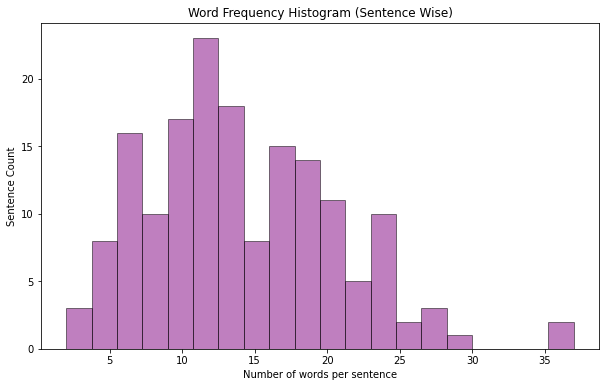

In [11]:
fig, ax = plt.subplots(figsize =(10, 6))
ax.hist(df_sent['Word Count'], 20, color = 'purple', alpha = 0.5, ec="black")

plt.xlabel('Number of words per sentence')
plt.ylabel('Sentence Count')
plt.title('Word Frequency Histogram (Sentence Wise)')

plt.show()

In [12]:
df_para['Word Count'] = df_para['Description'].apply(lambda x: len(x.split(' ')))

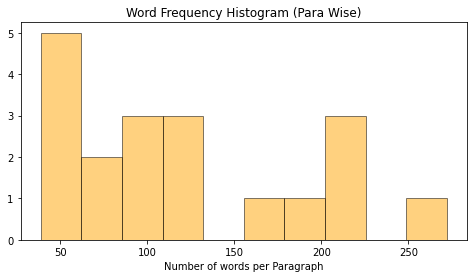

In [13]:
fig, ax = plt.subplots(figsize =(8, 4))
ax.hist(df_para['Word Count'], 10, color = 'orange', alpha = 0.5, ec="black")

plt.xlabel('Number of words per Paragraph')
plt.title('Word Frequency Histogram (Para Wise)')

plt.show()

In [14]:
df_para['Sent Count'] = df_para['Description'].apply(lambda x: len(list(nlp(x).sents)))

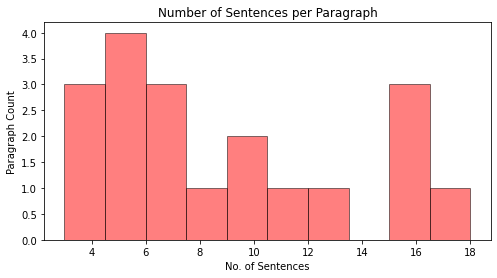

In [15]:
fig, ax = plt.subplots(figsize =(8, 4))
ax.hist(df_para['Sent Count'], 10, color = 'red', alpha = 0.5, ec="black")

plt.xlabel('No. of Sentences')
plt.ylabel('Paragraph Count')
plt.title('Number of Sentences per Paragraph')

plt.show()

### Visualizing N-grams

In [51]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_para['Description'], 20)
df2 = pd.DataFrame(common_words, columns = ['ParaText' , 'count'])

# Using Plotly
df2.groupby('ParaText').sum()['count'].sort_values(ascending=False).iplot( kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Chapter 2 after removing stop words')

#Using 

In [52]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_para['Description'], 20)
df4 = pd.DataFrame(common_words, columns = ['ParaText' , 'count'])

# Using Plotly
df4.groupby('ParaText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in Chapter 2 after removing stop words')

# Using MatplotLib

# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize =(20, 12))
# ax.bar(df4['ParaText'],df4['count'],  color = 'red', alpha = 0.45, ec="black")
# plt.xticks(rotation = 315, fontsize = 13)
# plt.show()

In [53]:
# def get_top_n_bigram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]
# common_words = get_top_n_bigram(df_para['Description'], 20)
# df4 = pd.DataFrame(common_words, columns = ['ParaText' , 'count'])
# #df4.groupby('ParaText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in Chapter 2 after removing stop words')

# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize =(20, 12))
# ax.bar(df4['ParaText'],df4['count'],  color = 'red', alpha = 0.45, ec="black")
# plt.xticks(rotation = 315, fontsize = 13)
# plt.show()


##### -- Viral Doshi